<a href="https://colab.research.google.com/github/anveshveeramalla/Anvesh_INFO5731_SPRING2022/blob/main/INFO5731_Assignment_Four_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [63]:
!pip install pyLDAvis 
!pip install ipympl
%matplotlib ipympl
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

In [64]:
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
import pandas as pd
df_tweets = pd.read_csv('/content/sample_data/twitter_data.csv',encoding='ISO-8859-1')
df_tweets

,S.NO,tweet,sentiment
0,0,silenc jgreenblattadl adl govmurphi demokkkrat...,negative
1,1,hope enjoy day selfcaresunday stargaz believer...,negative
2,2,april nationalarabamericanheritagemonth time c...,positive
3,3,marc andreesen hehim click donat blacklivesmat...,negative
4,4,blacklivesmatt buy church remov white doctrin ...,positive
...,...,...,...
6945,6945,seen love song latasha netflix yet u neverforg...,positive
6946,6946,mani watch netflix 20 minut short documentari ...,negative
6947,6947,black peopl realli need let go respect polit l...,negative
6948,6948,sat jun 27 2020 floriss missouri polic push pr...,negative


In [66]:
tweets_text_df = df_tweets[['tweet']]
tweets_text_df.head()

,tweet
0,silenc jgreenblattadl adl govmurphi demokkkrat...
1,hope enjoy day selfcaresunday stargaz believer...
2,april nationalarabamericanheritagemonth time c...
3,marc andreesen hehim click donat blacklivesmat...
4,blacklivesmatt buy church remov white doctrin ...


In [67]:
from nltk.corpus import stopwords
from textblob import TextBlob
df_tweets['lower'] = df_tweets['tweet'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df_tweets['tokenization'] = df_tweets['lower'].apply(lambda x: tokenizer.tokenize(x))
df_tweets['stemming'] = df_tweets['tokenization'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [68]:
txt = []
for line in df_tweets['stemming']:
  txt.append(line)

In [69]:
from gensim import corpora, models
bigram = models.Phrases(txt, min_count=5, threshold=100)
trigram = models.Phrases(bigram[txt], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
trigram_mod[bigram_mod[txt[0]]]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['silenc',
 'jgreenblattadl',
 'adl',
 'govmurphi',
 'demokkkrat',
 'parti',
 'kapo',
 'deafen',
 'cuz',
 'onl',
 'httpstcosxikgcaqz1']

In [70]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [71]:
import spacy
data_words_bigrams = make_bigrams(txt)
nlp = spacy.load('en', disable=['parser', 'ner'])
tf_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
tf_lemmatized[:1]

[['govmurphi', 'demokkkrat', 'parti', 'kapo']]

In [72]:
id2word = corpora.Dictionary(tf_lemmatized)
texts = tf_lemmatized
data_corpus = [id2word.doc2bow(text) for text in texts]
data_corpus[:1]

[[(0, 1), (1, 1), (2, 1), (3, 1)]]

In [73]:
id2word[0]

'demokkkrat'

In [74]:
[[(id2word[id], freq) for id, freq in cp] for cp in data_corpus[:1]]

[[('demokkkrat', 1), ('govmurphi', 1), ('kapo', 1), ('parti', 1)]]

In [75]:
lda_mdl = models.ldamodel.LdaModel(corpus=data_corpus,
                                           id2word=id2word,
                                           num_topics = 20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [76]:
from pprint import pprint
pprint(lda_mdl.print_topics())
doc_lda = lda_mdl[data_corpus]

[(0,
  '0.115*"would" + 0.048*"arrest" + 0.046*"organ" + 0.027*"bad" + 0.024*"big" '
  '+ 0.018*"old" + 0.018*"terrorist" + 0.017*"t" + 0.016*"feel" + '
  '0.016*"whole"'),
 (1,
  '0.068*"racism" + 0.063*"white" + 0.062*"racial" + 0.046*"rape" + '
  '0.041*"polic" + 0.033*"attack" + 0.031*"buy" + 0.023*"flag" + 0.021*"end" + '
  '0.020*"find"'),
 (2,
  '0.358*"black" + 0.069*"man" + 0.049*"still" + 0.025*"blacktwitt" + '
  '0.021*"read" + 0.016*"blackwoman" + 0.016*"allow" + 0.013*"ago" + '
  '0.013*"save" + 0.012*"safe"'),
 (3,
  '0.162*"peopl" + 0.089*"today" + 0.048*"come" + 0.043*"think" + '
  '0.027*"murder" + 0.026*"ask" + 0.024*"tell" + 0.023*"pay" + 0.019*"word" + '
  '0.019*"nee"'),
 (4,
  '0.108*"blm" + 0.088*"live" + 0.057*"amp" + 0.050*"foxnew" + 0.033*"put" + '
  '0.028*"vote" + 0.026*"check" + 0.024*"twitter" + 0.023*"fact" + '
  '0.018*"matter"'),
 (5,
  '0.092*"work" + 0.059*"give" + 0.049*"vaccin" + 0.037*"deserv" + 0.029*"art" '
  '+ 0.025*"write" + 0.024*"cancel" + 0

In [77]:
from gensim.models import CoherenceModel
print('Perplexity: ', lda_mdl.log_perplexity(data_corpus))
coh_model_lda = CoherenceModel(model=lda_mdl, texts=tf_lemmatized, dictionary=id2word, coherence='c_v')
coh_lda = coh_model_lda.get_coherence()
print('Coherence: ', coh_lda)

Perplexity:  -9.293487864246364
Coherence:  0.6340325425712663


In [78]:
tf_lemmatized

[['govmurphi', 'demokkkrat', 'parti', 'kapo'],
 [],
 [],
 ['blacklivesmatt'],
 ['buy', 'white', 'set', 'black', 'free', 'religion'],
 ['blacklivesmatt'],
 ['justicefor'],
 ['check',
  'mercari',
  'tap',
  'link',
  'sign',
  'get',
  'blacklivesmatt',
  'httpstcopctzkugniy'],
 ['tsimshian'],
 ['sure', 'look', 'jst'],
 ['httpstcojsriyvnb3w',
  'long',
  'put',
  'colour',
  'face',
  'despair',
  'look',
  'botto'],
 ['be'],
 ['blacklivesmatt', 'aoc'],
 ['tsimshian'],
 ['httpstconkzlajjpwj'],
 ['brunner'],
 ['news', 'weekend', 'full', 'freshresist'],
 [],
 [],
 [],
 ['materialwhxr', 'need', 'black', 'gay', 'blacklivesmatt'],
 ['translivesmatt', 'see', 'insular', 'child', 'sex'],
 [],
 ['puriti', 'mind', 'evil', 'hear', 'evil', 'speak'],
 ['solidar', 'alway', 'black', 'person', 'woman', 'alli'],
 ['kalief', 'browder', 'saytheirnam', 'blacklivesmatt'],
 ['make', 'grant', 'park', 'watch', 'httpstcokd8r3t6cbt'],
 ['doubl', 'find', 'blacklivesmatt', 'climatecrisi', 'emiss'],
 ['shepersist',

In [79]:
lsamodel = models.LsiModel(data_corpus, num_topics = 20, id2word = id2word)

In [80]:
lsamodel.print_topics(num_topics = 20)

[(0,
  '0.800*"blacklivesmatt" + 0.544*"black" + 0.098*"peopl" + 0.086*"blm" + 0.078*"antifa" + 0.077*"foxnew_cnn" + 0.055*"woman" + 0.051*"man" + 0.046*"say" + 0.036*"live"'),
 (1,
  '0.798*"black" + -0.556*"blacklivesmatt" + 0.109*"peopl" + -0.092*"antifa" + -0.090*"foxnew_cnn" + 0.088*"woman" + 0.067*"man" + 0.034*"live" + -0.031*"blm" + 0.029*"histori"'),
 (2,
  '0.702*"peopl" + 0.232*"say" + 0.210*"watch" + -0.196*"black" + 0.169*"make" + 0.151*"go" + 0.150*"know" + 0.146*"protest" + 0.140*"get" + -0.127*"antifa"'),
 (3,
  '-0.585*"watch" + 0.503*"peopl" + -0.460*"protest" + -0.208*"polic" + -0.133*"would" + -0.125*"make" + -0.124*"woman" + -0.097*"man" + -0.095*"say" + -0.084*"arrest"'),
 (4,
  '0.415*"antifa" + 0.409*"foxnew_cnn" + 0.361*"peopl" + 0.330*"watch" + -0.292*"say" + -0.254*"know" + 0.254*"protest" + -0.210*"go" + -0.201*"blm" + 0.110*"polic"'),
 (5,
  '0.418*"antifa" + 0.416*"say" + 0.412*"foxnew_cnn" + -0.409*"blm" + 0.285*"know" + 0.280*"go" + -0.138*"peopl" + 0.12

In [81]:
from gensim import corpora, models
coh_values = []
model_list = []
for num_topics in range(12):
  model_temp = models.LsiModel(data_corpus, num_topics = 20, id2word = id2word)
  model_list.append(model_temp)
  #print(model_list)
  coh_model = CoherenceModel(model= model_temp, texts = tf_lemmatized, dictionary = id2word, coherence='c_v')
  coh_values.append(coh_model.get_coherence())
coh_values

[0.42627744274739576,
 0.43098959733398823,
 0.4244924708185514,
 0.44374811185031077,
 0.39684211587113943,
 0.42664201707455307,
 0.41781023285164204,
 0.4130351696756275,
 0.3992845292728162,
 0.43034287902081364,
 0.4269322667615162,
 0.4574011036509759]

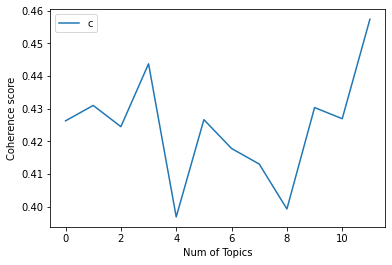

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
x = range(12)
plt.plot(x, coh_values)
plt.xlabel("Num of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"),loc='best')
plt.show()

In [83]:
!pip install biterm
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from biterm.btm import oBTM
from biterm.utility import vec_to_biterms, topic_summuary

bi_term = df_tweets['tweet'].head(100).values
vector = TfidfVectorizer(stop_words='english')
X_tfidf =vector.fit_transform(bi_term).toarray()

text = np.array(vector.get_feature_names())
words = vec_to_biterms(X_tfidf)

model = oBTM(num_topics=10, V=text)
model_lda= model.fit_transform(words, iterations=10)

topic_summuary(model.phi_wz.T, X_tfidf, text, 10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

Topic 0 | Coherence=-51.29 | Top words= color help watch skin look blacklivesmatt say brown black free
Topic 1 | Coherence=-14.23 | Top words= blacklivesmatt potu cnn dnc nato scotu copelandnetwork pontifex foxnew antifa
Topic 2 | Coherence=-48.21 | Top words= blacklivesmatt check protest polic lol arrest watch happi live life
Topic 3 | Coherence=-53.53 | Top words= amp 2020 watch american jul blacklivesmatt shall ground govinsle wash
Topic 4 | Coherence=-10.51 | Top words= million account attent 10000000 like lipaisbaddi tweet alll dollar popbas
Topic 5 | Coherence=-26.32 | Top words= plea fairblacklivesmatt health come texa jam drshariss implicitbia blacklivesmatt hannah
Topic 6 | Coherence=-33.11 | Top words= demvoice1 wtpblue american onev1 freshresist histori wave famili blue follow
Topic 7 | Coherence=-48.34 | Top words= alll like lipaisbaddi gnfskz account attent black histor north discrimin
Topic 8 | Coherence=-46.78 | Top words= blacklivesmatt blm organ histori nationalist spo

{'coherence': [-51.292626613201826,
  -14.230938492286182,
  -48.21112729424666,
  -53.5284161582987,
  -10.50911252671702,
  -26.315255948795603,
  -33.10668879064134,
  -48.33685256902239,
  -46.78095431441671,
  -34.188450139491295],
 'top_words': [array(['color', 'help', 'watch', 'skin', 'look', 'blacklivesmatt', 'say',
         'brown', 'black', 'free'], dtype='<U33'),
  array(['blacklivesmatt', 'potu', 'cnn', 'dnc', 'nato', 'scotu',
         'copelandnetwork', 'pontifex', 'foxnew', 'antifa'], dtype='<U33'),
  array(['blacklivesmatt', 'check', 'protest', 'polic', 'lol', 'arrest',
         'watch', 'happi', 'live', 'life'], dtype='<U33'),
  array(['amp', '2020', 'watch', 'american', 'jul', 'blacklivesmatt',
         'shall', 'ground', 'govinsle', 'wash'], dtype='<U33'),
  array(['million', 'account', 'attent', '10000000', 'like', 'lipaisbaddi',
         'tweet', 'alll', 'dollar', 'popbas'], dtype='<U33'),
  array(['plea', 'fairblacklivesmatt', 'health', 'come', 'texa', 'jam',
     

In [116]:
#Summarize the topic for each cluster(
#1.Color can help you see how your skin looks, and it's important to remember that blacklivesmatter.
#2.Different news channels about blacklivesmatter.
#3.police arrest the protestors
#4.The black lives matter watch in america in 2020 will be grounded.
#5.millions of tweets and likes  are being made regarding blacklivesmatter.
#6.hannah pleaing about blacklivesmatter.
#7.A twitter account being followed by another account.
#8.So many people liking the post of a person who posted post regarding blacklivesmatter.
#9.politicians discussing on blacklivesmatter.
#10.Scamalert to buy in view of blacklivesmatter

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

To create sentiment classifiers, I used SVM and multinomial Naivee Bayes algorithms.To deal with the most common words, I used Term Frequency Inverse Document Frequency (TF-IDF).
TF-IDF allows you to associate each word in a document with a numerical value that indicates how important that word is in that document. The vectors for documents with similar, relevant words will then be similar.

In [84]:
# Write your code here
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer()
x_tf_vect = tf_vect.fit_transform(df_tweets['tweet'])
x_tf_vect.shape





(6950, 17749)

In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
mul_nb = MultinomialNB()
l_svc = LinearSVC()

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x_tf_vect, df_tweets['sentiment'], test_size=0.2, random_state=20)

mnb_model = mul_nb.fit(x_train,y_train)

In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred_mnb = mnb_model.predict(x_test)
print('MultinomialNB Model:')
print(f'Accuracy: ${accuracy_score(y_pred_mnb,y_test)}')
print(f'Classification report:')
print(classification_report(y_test,y_pred_mnb))

MultinomialNB Model:
Accuracy: $0.4381294964028777
Classification report:
              precision    recall  f1-score   support

    negat ve       0.00      0.00      0.00        13
    negatave       0.00      0.00      0.00        15
    negatbve       0.00      0.00      0.00         1
    negatcve       0.00      0.00      0.00         3
    negatdve       0.00      0.00      0.00         2
      negate       0.00      0.00      0.00         6
    negateve       0.00      0.00      0.00         6
    negatfve       0.00      0.00      0.00         1
    negatgve       0.00      0.00      0.00         2
    negathve       0.00      0.00      0.00         2
    negative       0.44      0.75      0.56       505
    negatkve       0.00      0.00      0.00         1
    negatlve       0.00      0.00      0.00         8
    negatmve       0.00      0.00      0.00         3
    negatnve       0.00      0.00      0.00         4
    negatove       0.00      0.00      0.00         3
    neg

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
from sklearn.model_selection import cross_val_score

corss_val_score = cross_val_score(mnb_model, x_test, y_test, cv=7)
print("MNB Mean",corss_val_score.mean())


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,


MNB Mean 0.41297396071265424


In [89]:
svm_model = l_svc.fit(x_train,y_train)
y_svm_pred = svm_model.predict(x_test)
print('SVM Model:')
print(f'Accuracy: ${accuracy_score(y_svm_pred, y_test)}')
print(classification_report(y_test, y_svm_pred))

SVM Model:
Accuracy: $0.4237410071942446
              precision    recall  f1-score   support

    negat ve       0.00      0.00      0.00        13
    negatave       0.00      0.00      0.00        15
    negatbve       0.00      0.00      0.00         1
    negatcve       1.00      0.33      0.50         3
    negatdve       0.00      0.00      0.00         2
      negate       0.00      0.00      0.00         6
    negateve       0.00      0.00      0.00         6
    negatfve       0.00      0.00      0.00         1
    negatgve       0.00      0.00      0.00         2
    negathve       0.00      0.00      0.00         2
    negative       0.46      0.62      0.52       505
    negatkve       0.00      0.00      0.00         1
    negatlve       0.67      0.25      0.36         8
    negatmve       0.00      0.00      0.00         3
    negatnve       0.00      0.00      0.00         4
    negatove       0.00      0.00      0.00         3
    negatpve       0.00      0.00      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [90]:
scores = cross_val_score(svm_model, x_test, y_test, cv=7)
print(f'SVM Mean: ${scores.mean()}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,


SVM Mean: $0.41510583219125935


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [91]:
# Write your code here
!pip install --user numpy
!pip install --user  pandas



In [92]:
import pandas as pd
test_df = pd.read_csv('/content/sample_data/test.csv')
train_df = pd.read_csv('/content/sample_data/train.csv')

In [93]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [94]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [95]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [96]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

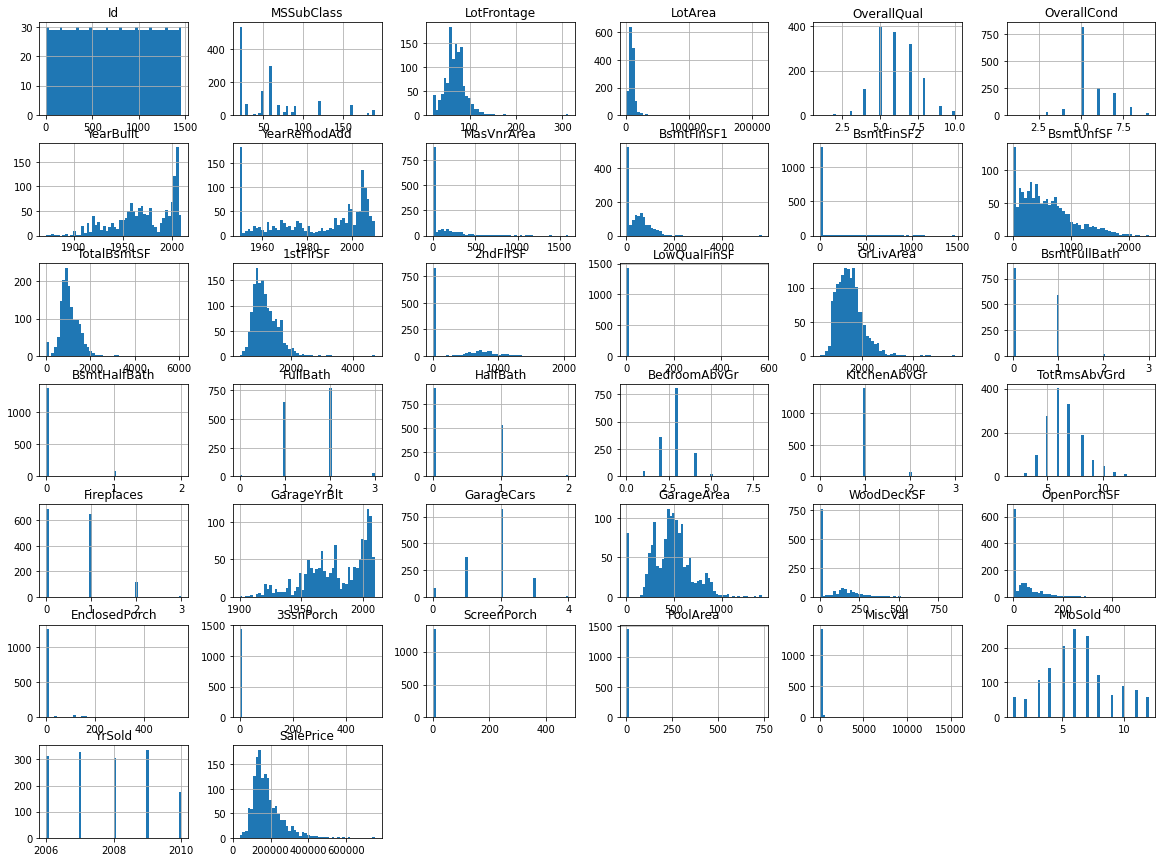

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [98]:
cor_matrix = train_df.corr()
cor_matrix["YrSold"].sort_values(ascending=False)
cor_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

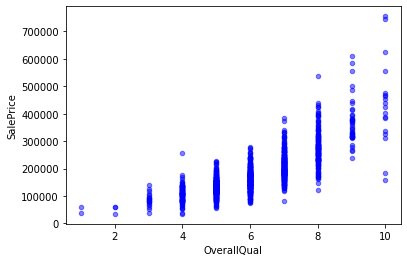

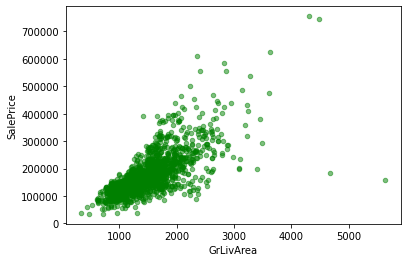

In [100]:
train_df.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5, color="b")
train_df.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5, color="g")

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

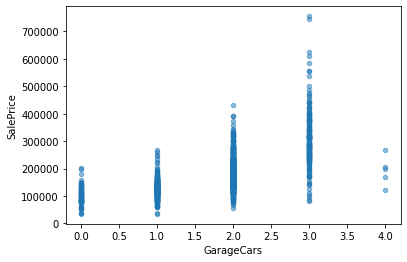

In [101]:
train_df.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

<AxesSubplot:>

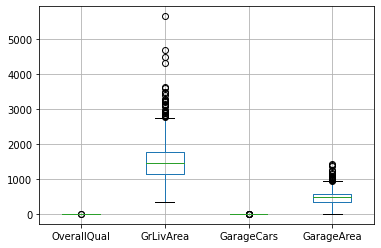

In [107]:
train_df.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

<AxesSubplot:>

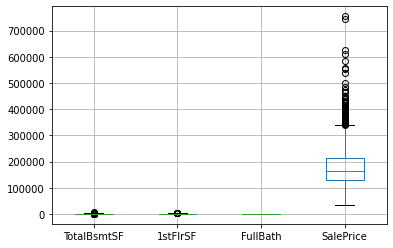

In [106]:
train_df.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [108]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [109]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [110]:
import numpy as np
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [111]:
train_df.fillna(999, inplace=True)

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

columns = ['GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotShape', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning','LotConfig']

for c in columns:
    encoder_train = LabelEncoder()
    encoder_test = LabelEncoder()
    encoder_train.fit(list(train_df[c].values))
    encoder_test.fit(list(test_df[c].values))
    train_df[c] = encoder_train.transform(list(train_df[c].values))
    test_df[c] = encoder_test.transform(list(test_df[c].values))

x_train = train_df[train_df.columns[:80]]
y_train = train_df['YrSold']
x_test = test_df[test_df.columns[:80]]

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [113]:
import numpy as np
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.fillna(999, inplace=True)

In [114]:
predicted = regressor.predict(x_train)

In [115]:
pd.DataFrame({'Predicted_Prices': predicted})

,Predicted_Prices
0,2.000000e+00
1,1.000000e+00
2,2.000000e+00
3,-1.753184e-13
4,2.000000e+00
...,...
1455,1.000000e+00
1456,4.000000e+00
1457,4.000000e+00
1458,4.000000e+00
